# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Medir un elemento de polarizacion

**Autor**: Jesús del Hoyo

**Fecha**:   20/09/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

Durante la creación de este archivo el polarímetro se encontraba en transmisión, pero debería poder usarse directamente en reflexión. Sin embargo, funciona con el fotodiodo, no con la cámara.

**Elementos ópticos**:
1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina de cuarto de onda (preguntar a Luismi cual)
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  1 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 2 LPNIRE100-B (P2).
1. Fotodiodo (ver cual).



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

from polarimeter.utils import dibujar_2d_fitting, sort_positions

## Preparar los experimentos

Tarjeta de adquisición de datos.

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)

0.722713922383


Parametros iniciales

In [5]:
from polarimeter.polarimeter import get_polarimeter_parameters, degrees, degrees_motor

config_dicts=get_polarimeter_parameters(kind='exp')

pol1,pol2,pol3,pol4=config_dicts
#theta1=pol1['theta_axis']
#theta4=pol4['theta_axis']
theta1 = 125.992
theta2 = 39.932
theta3 = 16.287
theta4 = 135.633

print("theta_1={}º, theta_4={}º".format(theta1/degrees, theta4/degrees))

theta_1=7218.80985241º, theta_4=7771.1984627º


Motores

In [6]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]

In [7]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



Poner la fuente al mismo voltaje y corriente que anteriormente.

V = 2.56 V.

I = 338 mA.

## Recaracterización de los retardadores

Vamos a probar a hacer este experimento sin el beam splitter. Al repetir la calibración de los retardadores, es posible que al tener un elemento menos tengamos menos ruido y mejores resultados.

** Un retardador **

In [90]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

0.0012, 

In [87]:
# Data of the experiment
num_dataX = 15 #15
num_dataY = 14 #14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [angle1, 0, 0, angle4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0



1.8894, 2.1298, 2.1657, 1.9815, 1.6233, 1.1679, 0.7227, 0.3901, 0.2571, 0.3338, 0.6101, 1.0297, 1.4954, 1.8842, 

1.9456, 2.2424, 2.3192, 2.1350, 1.7410, 1.2242, 0.7074, 0.3082, 0.1189, 0.1854, 0.4822, 0.9427, 1.4749, 1.9405, 

1.8587, 2.1657, 2.2527, 2.1043, 1.7563, 1.2805, 0.7892, 0.4004, 0.2008, 0.2315, 0.4873, 0.9120, 1.4033, 1.8587, 

1.6437, 1.8894, 1.9763, 1.8996, 1.6591, 1.3163, 0.9530, 0.6511, 0.4771, 0.4771, 0.6408, 0.9325, 1.2958, 1.6386, 

1.3470, 1.4851, 1.5619, 1.5568, 1.4800, 1.3367, 1.1679, 1.0093, 0.8967, 0.8609, 0.9069, 1.0195, 1.1781, 1.3470, 

1.0195, 1.0246, 1.0707, 1.1525, 1.2446, 1.3265, 1.3879, 1.4084, 1.3828, 1.3265, 1.2344, 1.1423, 1.0655, 1.0246, 

0.7432, 0.6050, 0.6153, 0.7534, 1.0041, 1.2958, 1.5772, 1.7717, 1.8382, 1.7614, 1.5568, 1.2753, 0.9837, 0.7381, 

0.5487, 0.3082, 0.2724, 0.4515, 0.8046, 1.2497, 1.6847, 2.0173, 2.1554, 2.0838, 1.8126, 1.4033, 0.9479, 0.5590, 

0.4976, 0.1906, 0.1189, 0.2980, 0.6818, 1.1935, 1.7000, 2.0991, 2.2885, 2.2322, 1.9405

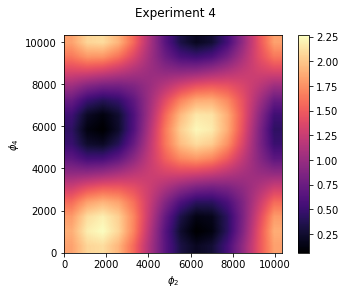

In [91]:
# Save data
filename="Experimento_4_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 4')

** Dos retardadores**

Polarizadores paralelos.

In [92]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 



0.9734, 1.5158, 1.8791, 1.9610, 1.9201, 1.9712, 2.1810, 2.3396, 2.2219, 1.7307, 1.0604, 0.5897, 0.5692, 0.9632, 

1.3674, 1.8945, 2.2322, 2.1657, 1.8535, 1.6437, 1.7614, 2.1094, 2.3294, 2.1605, 1.6540, 1.1474, 1.0246, 1.3572, 

1.6489, 2.0224, 2.2782, 2.1503, 1.6847, 1.2549, 1.2088, 1.5875, 2.0991, 2.3294, 2.1503, 1.7512, 1.5107, 1.6386, 

1.8382, 1.9303, 1.9968, 1.7921, 1.3163, 0.8199, 0.6460, 0.9581, 1.5823, 2.1350, 2.3294, 2.1759, 1.9201, 1.8280, 

2.0122, 1.8331, 1.6182, 1.2907, 0.8404, 0.4259, 0.2673, 0.5232, 1.1116, 1.7563, 2.2066, 2.3243, 2.2015, 2.0019, 

2.2015, 1.8945, 1.4493, 0.9376, 0.4720, 0.1906, 0.1803, 0.4669, 0.9632, 1.5056, 1.9661, 2.2424, 2.3141, 2.1810, 

2.3192, 2.1196, 1.6233, 0.9734, 0.4362, 0.2161, 0.3748, 0.7790, 1.2293, 1.5875, 1.8535, 2.0736, 2.2578, 2.3141, 

2.2527, 2.3141, 2.0122, 1.3981, 0.7943, 0.5385, 0.7585, 1.2651, 1.7358, 1.9354, 1.9149, 1.8894, 2.0224, 2.2424, 

1.9047, 2.2424, 2.2987, 1.9405, 1.3930, 1.0553, 1.1883, 1.6744, 2.1452, 2.2578, 2.0173

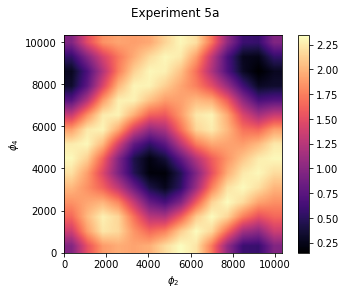

In [94]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [theta1, angle1, angle4, theta4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_5a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 5a')

Polarizadores cruzados.

In [8]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

0.0012, 

In [96]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [theta1, angle1, angle4, theta4+90], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_5b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 5b')



1.4493, 0.9223, 0.5794, 0.5027, 0.5487, 0.4976, 0.2878, 0.1189, 0.2264, 0.7074, 1.3521, 1.8075, 1.8280, 1.4237, 

1.0297, 0.5129, 0.1957, 0.2724, 0.5948, 0.8097, 0.6920, 0.3441, 0.1087, 0.2673, 0.7636, 1.2446, 1.3674, 1.0246, 

0.7534, 0.3850, 0.1394, 0.2878, 0.7585, 1.1935, 1.2395, 0.8660, 0.3594, 0.1087, 0.2724, 0.6562, 0.8865, 0.7432, 

0.5692, 0.4822, 0.4208, 0.6306, 1.1167, 1.6182, 1.7921, 1.4851, 0.8660, 0.3082, 0.1138, 0.2520, 0.4873, 0.5743, 

0.4157, 0.5999, 0.8148, 1.1372, 1.5875, 2.0122, 2.1657, 1.9149, 1.3367, 0.6818, 0.2366, 0.1087, 0.2213, 0.4106, 

0.2417, 0.5487, 0.9939, 1.5056, 1.9661, 2.2475, 2.2578, 1.9712, 1.4800, 0.9274, 0.4669, 0.1854, 0.1138, 0.2417, 

0.1189, 0.3236, 0.8251, 1.4800, 2.0173, 2.2271, 2.0684, 1.6642, 1.2037, 0.8455, 0.5743, 0.3492, 0.1701, 0.1240, 

0.1803, 0.1292, 0.4413, 1.0553, 1.6693, 1.9201, 1.7000, 1.1832, 0.7125, 0.5027, 0.5129, 0.5232, 0.3850, 0.1701, 

0.5078, 0.1854, 0.1394, 0.5129, 1.0604, 1.4084, 1.2753, 0.7943, 0.3134, 0.1854, 0.4106

## Experimento de medida de matriz de polarización

Aquí vamos a tomar una serie de medidas para calcular la matriz de Mueller de una muestra.

In [23]:
# Parámetros
N = 200 # Numero de medidas
todos = True # Mover todos los motores (True) o solo los de los rotadores (False).
filename="Retardador_WPQ10ME_405_30deg_todos_{}".format(datetime.date.today())

# Preparar los ángulos aleatorios
angles = np.random.rand(N,4)*360
# Ordenarlos
pos_ini = motors.get_position()
#print(pos_ini[1])
angles = sort_positions(angles, pos_ini[1])
# Empezar a medir
I = np.zeros(N)
for ind in range(N):
    if todos:
        motors.move(
            positions = [angles[ind,0]+theta1, angles[ind,1], angles[ind,2], angles[ind,3]+theta4], velocities=Vels, kind='absolute',  verbose=False)
    else:
        motors.move(
            positions = [theta1, angles[ind,1], angles[ind,2], theta4], velocities=Vels, kind='absolute',  verbose=False)
    I[ind] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
I = I - intensity_0

# Save data
np.savez(filename+'.npz', angulos = angles, todos = todos, intensidad=I)



motor     = (412.33,  -3.69, -335.57, 408.90)
absolute  = (412.33,   3.69, 335.57, 408.90)
polarizer = (409.54, -40.88, 203.81, 247.02)
1.0758, 0.3697, 1.4493, 2.2936, 1.0451, 0.7381, 0.8660, 1.5772, 0.7022, 1.1883, 0.8916, 0.2520, 1.5568, 0.8097, 0.6153, 2.1708, 0.9683, 1.6437, 0.5743, 1.1883, 0.7125, 1.9559, 1.3828, 1.9149, 1.9303, 1.3572, 2.2834, 1.0604, 1.9201, 0.3287, 0.7534, 1.9508, 1.6182, 1.5005, 1.5261, 0.1854, 0.2468, 0.9274, 0.3338, 1.6898, 1.8842, 1.1679, 1.5721, 1.3777, 1.9610, 1.7256, 1.2805, 1.5363, 1.0041, 0.6460, 0.3952, 1.7103, 2.3192, 2.1094, 0.3594, 1.2856, 1.8689, 0.1343, 1.4186, 0.3185, 1.0297, 0.1803, 1.7410, 2.2219, 2.2578, 1.3572, 1.5414, 1.9149, 0.5436, 1.4954, 1.9354, 0.4106, 0.8404, 1.6796, 2.3703, 1.0144, 1.2190, 2.0684, 0.2827, 0.3390, 0.7688, 0.4464, 0.7995, 0.7943, 1.4033, 1.1372, 1.3367, 0.2571, 0.4004, 0.4362, 0.3952, 1.3828, 2.1452, 0.6153, 0.3390, 0.4464, 1.1576, 1.9763, 1.3879, 1.4288, 1.0962, 0.3082, 0.3697, 1.8075, 0.6767, 0.4362, 1.3316, 1.8740, 

## Final

In [14]:
motors.close()
del motors
LabJackPython.Close()